In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

os.makedirs('./results', exist_ok=True)

with open('./brown_100.txt', 'r') as file_:
    corpus = file_.read()

def write_freqs(list_: list, filename: str) -> None:
    with open(f'./results/{filename}.txt', 'w') as file_:
        file_.write('\n'.join([' '.join(x[0]) + ' | ' + str(x[1]) for x in list_]))

RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

## N-Gram Language Modeling
In the second assignment, you will implement an **n-gram language model** that processes input text to generate, analyze, and calculate the probabilities of sequences of `n` words (n-grams). This model will tokenize text, create n-grams, and compute their frequencies and probabilities, returning the most frequent n-grams in the text.

1. **Tokenization**: Convert the input text into a list of words (tokens).
2. **N-gram Generation**: Create sequences of `n` tokens from the text, treating each sentence independently with the inclusion of start (`<s>`) and end (`</s>`) markers.
3. **Frequency Counting**: Count how many times each n-gram appears in the text.
4. **Probability Calculation**: Compute the probabilities of each n-gram based on its frequency and add alpha smoothing to improve generalization of items.
5. **Most Frequent N-grams**: Return the most frequent n-grams along with their probabilities, helping to identify common patterns in the text.

In [15]:
from collections import Counter, defaultdict # You may import more from collections if needed

class NGramModel:
    def __init__(self, text, n, alpha=0.0):
        """
        Initialize the NGramModel with text and the value of n.
        """
        self.text = text
        self.n = n
        self.alpha = alpha  # Alpha value for additive smoothing
        self.ngrams = {}
        self.probabilities = {}
        self.vocab = set()

    def tokenize(self) -> None:
        """
        Tokenize the text into words. 
        Fill in the code to split the text into a list of words.
        """
        initial_tokens = self.text.split()
        tokens = [token.lower() for token in initial_tokens]  
        self.vocab.update(tokens) 
        
    
        return tokens


    def generate_ngrams(self, tokens: list) -> dict:
        """
        Generate n-grams from the list of tokens.
        Fill in the code to create n-grams.
        Make sure to treat each sentence independently, include the <s> and </s> tokens.
        """
        self.ngrams = defaultdict(int)
        self.n_minus_1_grams = defaultdict(int) 
        current_sentence = []
        
        for token in tokens:
            if token == '<s>':
                current_sentence = []
            elif token == '</s>':
                if current_sentence or self.n==1:
                    padded_sentence = ['<s>'] * (self.n-1) + current_sentence + ['</s>']
                    for i in range(len(padded_sentence)-self.n+1):
                        ngram = tuple(padded_sentence[i:i+self.n])
                        self.ngrams[ngram] += 1

                        if self.n>1:
                            n_minus_1_gram = ngram[:-1]
                            self.n_minus_1_grams[n_minus_1_gram] += 1

                current_sentence = []
            else:
                current_sentence.append(token)

        return self.ngrams




    def count_frequencies(self) -> None:
        """
        Count the frequencies of each n-gram.
        Fill in the code to count n-gram occurrences.
        """
        

       
        for ngram, count in self.ngrams.items():
            print(f"{ngram}: {count}")

    

       

    def calculate_probabilities(self) -> None:
        """
        Calculate probabilities of each n-gram based on its frequency. Add alpha smoothing separately.
        """

        vocab_size = len(self.vocab)
        alpha = self.alpha 
        self.probabilities = {}
        if self.n == 1:
            total_token_count = sum(self.ngrams.values())
            if total_token_count == 0:
                print("No unigrams found.")
                return
            for unigram,count in self.ngrams.items(): 
                numerator = count + alpha 
                denominator = total_token_count + alpha * vocab_size        #----The formula for unigram probability is P(w) = (count(w) + alpha) / (N + alpha * V)----# 
                self.probabilities[unigram] = numerator / denominator
        else:
            for ngram,coun_ngram in self.ngrams.items():
                context= ngram[:-1]
                count_context = self.n_minus_1_grams[context] if context in self.n_minus_1_grams else 0
                numerator = coun_ngram + alpha
                denominator = count_context + (alpha * vocab_size)    #----The formula for n-gram probability is P(w_n|w_1...w_(n-1)) = (count(w_1...w_n) + alpha) / (count(w_1...w_(n-1)) + alpha * V)----#

                if denominator == 0:
                    self.probabilities[ngram] = 0.0
                else:
                    self.probabilities[ngram] = numerator / denominator
        print(f"Calculated probabilities for {len(self.probabilities)} n-grams.")

        


    def most_frequent_ngrams(self, top_n: int = 10) -> list:
        """
        Return the most frequent n-grams and their probabilities.
        """

        sorted_by_prob = sorted(self.probabilities.items(), key=lambda item: item[1], reverse=True)
        sorted_grams = sorted_by_prob[:top_n]
        return sorted_grams

# Testing the model with an example
text = "This is a simple example to demonstrate how n-grams work in this assignment." #Faster than running the full corpus
n = 2  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(text, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

# Print the most frequent n-grams
print(model.most_frequent_ngrams(10))

Calculated probabilities for 0 n-grams.
[]


### Unigrams

In this section, we apply the `NGramModel` to our corpus. The model can be configured to generate unigrams, bigrams, or trigrams by adjusting the value of `n`. After tokenizing the text and generating the n-grams, the model counts the occurrences of each n-gram and calculates their probabilities. The most frequent n-grams are then written to an output file.

By adjusting the n-gram size, we can analyze different levels of word dependencies in the text, providing insights into common word sequences and patterns.  

The code below will generate unigrams when the NGramModel is implemented correctly

In [16]:
n = 1  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'unigrams')

('the',): 156
('fulton',): 14
('county',): 15
('grand',): 4
('jury',): 18
('said',): 24
('friday',): 4
('an',): 6
('investigation',): 1
('of',): 67
("atlanta's",): 2
('recent',): 1
('primary',): 4
('election',): 14
('produced',): 1
('``',): 35
('no',): 4
('evidence',): 1
("''",): 34
('that',): 28
('any',): 1
('irregularities',): 3
('took',): 2
('place',): 4
('.',): 89
('</s>',): 100
('further',): 1
('in',): 40
('term-end',): 1
('presentments',): 1
('city',): 9
('executive',): 2
('committee',): 4
(',',): 88
('which',): 13
('had',): 3
('over-all',): 1
('charge',): 2
('deserves',): 1
('praise',): 1
('and',): 40
('thanks',): 1
('atlanta',): 5
('for',): 22
('manner',): 2
('was',): 18
('conducted',): 1
('september-october',): 1
('term',): 3
('been',): 7
('charged',): 2
('by',): 10
('superior',): 2
('court',): 4
('judge',): 1
('durwood',): 1
('pye',): 1
('to',): 55
('investigate',): 1
('reports',): 2
('possible',): 1
('hard-fought',): 1
('won',): 1
('mayor-nominate',): 1
('ivan',): 2
('allen'

### Bigrams
Bigrams allow us to explore word pairs and their relationships, providing insight into common word combinations and phrase structures within the corpus.  
The code below will generate bigrams when the NGramModel is implemented correctly.

In [17]:
n = 2  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'bigrams')

('<s>', 'the'): 27
('the', 'fulton'): 6
('fulton', 'county'): 6
('county', 'grand'): 1
('grand', 'jury'): 3
('jury', 'said'): 8
('said', 'friday'): 1
('friday', 'an'): 1
('an', 'investigation'): 1
('investigation', 'of'): 1
('of', "atlanta's"): 1
("atlanta's", 'recent'): 1
('recent', 'primary'): 1
('primary', 'election'): 1
('election', 'produced'): 1
('produced', '``'): 1
('``', 'no'): 1
('no', 'evidence'): 1
('evidence', "''"): 1
("''", 'that'): 1
('that', 'any'): 1
('any', 'irregularities'): 1
('irregularities', 'took'): 1
('took', 'place'): 1
('place', '.'): 1
('.', '</s>'): 89
('the', 'jury'): 13
('jury', 'further'): 1
('further', 'said'): 1
('said', 'in'): 1
('in', 'term-end'): 1
('term-end', 'presentments'): 1
('presentments', 'that'): 1
('that', 'the'): 5
('the', 'city'): 4
('city', 'executive'): 1
('executive', 'committee'): 2
('committee', ','): 1
(',', 'which'): 3
('which', 'had'): 1
('had', 'over-all'): 1
('over-all', 'charge'): 1
('charge', 'of'): 1
('of', 'the'): 14
('the

### Trigrams
Trigrams capture three-word sequences, providing a deeper understanding of longer word dependencies and commonly occurring phrases within the text.  
The code below will generate trigrams when the NGramModel is implemented correctly

In [18]:
n = 3  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'trigrams')

('<s>', '<s>', 'the'): 27
('<s>', 'the', 'fulton'): 1
('the', 'fulton', 'county'): 3
('fulton', 'county', 'grand'): 1
('county', 'grand', 'jury'): 1
('grand', 'jury', 'said'): 1
('jury', 'said', 'friday'): 1
('said', 'friday', 'an'): 1
('friday', 'an', 'investigation'): 1
('an', 'investigation', 'of'): 1
('investigation', 'of', "atlanta's"): 1
('of', "atlanta's", 'recent'): 1
("atlanta's", 'recent', 'primary'): 1
('recent', 'primary', 'election'): 1
('primary', 'election', 'produced'): 1
('election', 'produced', '``'): 1
('produced', '``', 'no'): 1
('``', 'no', 'evidence'): 1
('no', 'evidence', "''"): 1
('evidence', "''", 'that'): 1
("''", 'that', 'any'): 1
('that', 'any', 'irregularities'): 1
('any', 'irregularities', 'took'): 1
('irregularities', 'took', 'place'): 1
('took', 'place', '.'): 1
('place', '.', '</s>'): 1
('<s>', 'the', 'jury'): 6
('the', 'jury', 'further'): 1
('jury', 'further', 'said'): 1
('further', 'said', 'in'): 1
('said', 'in', 'term-end'): 1
('in', 'term-end', 'pre

### Smoothing
Below, we generate **bigrams** with **smoothing** applied by setting `n = 2` and including a smoothing parameter `alpha = 1.0`. Smoothing is useful in language models to handle unseen n-grams by assigning a small probability to them. The model tokenizes the text, generates bigrams, counts their frequencies, and calculates smoothed probabilities. The most frequent bigrams are then written to an output file.





In [19]:
n = 2  # You can change this to 1, 2, or 3 for uni, bi, or trigrams
model = NGramModel(corpus, n, alpha=0.7)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()

write_freqs(model.most_frequent_ngrams(10), 'bigrams_smoothed')

('<s>', 'the'): 27
('the', 'fulton'): 6
('fulton', 'county'): 6
('county', 'grand'): 1
('grand', 'jury'): 3
('jury', 'said'): 8
('said', 'friday'): 1
('friday', 'an'): 1
('an', 'investigation'): 1
('investigation', 'of'): 1
('of', "atlanta's"): 1
("atlanta's", 'recent'): 1
('recent', 'primary'): 1
('primary', 'election'): 1
('election', 'produced'): 1
('produced', '``'): 1
('``', 'no'): 1
('no', 'evidence'): 1
('evidence', "''"): 1
("''", 'that'): 1
('that', 'any'): 1
('any', 'irregularities'): 1
('irregularities', 'took'): 1
('took', 'place'): 1
('place', '.'): 1
('.', '</s>'): 89
('the', 'jury'): 13
('jury', 'further'): 1
('further', 'said'): 1
('said', 'in'): 1
('in', 'term-end'): 1
('term-end', 'presentments'): 1
('presentments', 'that'): 1
('that', 'the'): 5
('the', 'city'): 4
('city', 'executive'): 1
('executive', 'committee'): 2
('committee', ','): 1
(',', 'which'): 3
('which', 'had'): 1
('had', 'over-all'): 1
('over-all', 'charge'): 1
('charge', 'of'): 1
('of', 'the'): 14
('the

### Generating Text
In this example, we generate text using the **bigrams** model by providing a starting **prompt** (e.g., "the jury"). The `generate_text` function creates a sequence of words based on the trained bigram model, starting from the provided prompt and continuing based on the probabilities of the next words.

After tokenizing the corpus, generating bigrams, and calculating their frequencies and probabilities, the model uses these learned probabilities to generate text. The generated output is then written to a file.

Text generation with n-grams helps illustrate how language models can predict word sequences, allowing us to create new sentences that follow similar patterns found in the original text.

In [20]:
def generate_text(model: NGramModel, n: int, prompt: str, max_length =10) -> str:
    

    prompt_tokens = [token.lower() for token in prompt.split()]
    generated_tokens = prompt_tokens.copy()

    for _ in range(max_length - len(prompt_tokens)):
        if n == 1:
            context = ()
        elif len(generated_tokens) < n - 1:
            padding = n - 1 - len(generated_tokens)
            context = tuple(['<s>'] * padding + generated_tokens)
        else:
            context = tuple(generated_tokens[-(n - 1):])
        possible_next_tokens = []
        probabilities = []

        if n == 1: # This is for Unigram case
             for unigram_tuple, prob in model.probabilities.items():
                  token = unigram_tuple[0]
                  if token != ['<s>']: # Avoid generating <s>.
                       possible_next_tokens.append(token)
                       probabilities.append(prob)
        else: # this is for n>1 case
            for ngram_tuple, prob in model.probabilities.items():
                if ngram_tuple[:-1] == context:
                    possible_next_tokens.append(ngram_tuple[-1])
                    probabilities.append(prob)
        if not possible_next_tokens:
            break 


        total_prob = sum(probabilities)
        
        if total_prob <= 0: # Avoid division by zero
            break

        normalized_probabilities = [p / total_prob for p in probabilities]

        
        if not normalized_probabilities: 
             break
        next_token = random.choices(possible_next_tokens, weights=normalized_probabilities, k=1)[0]


       
        generated_tokens.append(next_token)
        # Stop if end symbol is generated.
        if next_token == ['</s>']:
            break


    return ' '.join(generated_tokens)

tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
model.count_frequencies()
model.calculate_probabilities()
generated_text = generate_text(model, 2, 'the jury')
with open(f'./results/generated_bigrams.txt', 'w') as file_:
    file_.write(generated_text)

('<s>', 'the'): 27
('the', 'fulton'): 6
('fulton', 'county'): 6
('county', 'grand'): 1
('grand', 'jury'): 3
('jury', 'said'): 8
('said', 'friday'): 1
('friday', 'an'): 1
('an', 'investigation'): 1
('investigation', 'of'): 1
('of', "atlanta's"): 1
("atlanta's", 'recent'): 1
('recent', 'primary'): 1
('primary', 'election'): 1
('election', 'produced'): 1
('produced', '``'): 1
('``', 'no'): 1
('no', 'evidence'): 1
('evidence', "''"): 1
("''", 'that'): 1
('that', 'any'): 1
('any', 'irregularities'): 1
('irregularities', 'took'): 1
('took', 'place'): 1
('place', '.'): 1
('.', '</s>'): 89
('the', 'jury'): 13
('jury', 'further'): 1
('further', 'said'): 1
('said', 'in'): 1
('in', 'term-end'): 1
('term-end', 'presentments'): 1
('presentments', 'that'): 1
('that', 'the'): 5
('the', 'city'): 4
('city', 'executive'): 1
('executive', 'committee'): 2
('committee', ','): 1
(',', 'which'): 3
('which', 'had'): 1
('had', 'over-all'): 1
('over-all', 'charge'): 1
('charge', 'of'): 1
('of', 'the'): 14
('the

## Word Vectors
Based on the Stanford course: https://web.stanford.edu/class/cs224n/

### Count based W2V
In this section, we use the previously trained **n-gram model** to calculate a **co-occurrence matrix**. A co-occurrence matrix shows how often words appear together within a specific context (in this case, bigrams), providing insights into word relationships in the corpus.

Steps:
1. **Tokenization and N-gram Generation**: We first tokenize the text and generate bigrams using the `NGramModel`.
2. **Vocabulary and Indexing**: The vocabulary is created from the unique tokens, and a word-to-index mapping is established.
3. **Co-occurrence Matrix**: Using the generated n-grams, we compute the co-occurrence matrix, where each entry represents how often two words occur together within the bigrams.

The co-occurrence matrix provides a numerical representation of word relationships, which is useful for tasks like word embeddings, semantic analysis, and understanding word associations.

In [22]:
# Since we already have a working ngram model, for the next part we can use the ngrams to calculate the co-occurences.
model = NGramModel(corpus, 2)
tokens = model.tokenize()
ngrams = model.generate_ngrams(tokens)
vocab = list(model.vocab)

def create_co_matrix(ngrams: list, vocab_size: int, word_to_index: dict) -> pd.DataFrame:
    matrix = np.zeros((vocab_size, vocab_size), dtype=int)

    for ngram in ngrams:
        w1, w2 = ngram  
        idx1 = word_to_index[w1]
        idx2 = word_to_index[w2]
        matrix[idx1][idx2] += 1

    index_to_word = {idx: word for word, idx in word_to_index.items()}
    words = [index_to_word[i] for i in range(vocab_size)]
    co_matrix_df = pd.DataFrame(matrix, index=words, columns=words)
    return co_matrix_df

vocab = list(set(tokens))
vocab_size = len(vocab)

# Create a word-to-index mapping
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# Generate the co-occurrence matrix
co_matrix = create_co_matrix(ngrams, vocab_size, word_to_index)

# Optionally, print the matrix or parts of it
print(co_matrix.value_counts())

eliminate  gop  intern  obtain  man  felix  well  money  only  offered  operation  caldwell's  friday  reduce  word  together  atlanta  but  realize  jan.  plan  similar  airport  local  rejected  reconsideration  tabb  department  career  enthusiastic  provided  coordinator  portion  guardians  former  mayor's  13th  citizens  body's  afternoon  marvin  into  often  wait  :  prison  son  gun  unanimous  make  adamant  election  city  surveillance  divorce  added  suit  approve  $3  priority  court  allen  petitions  achieve  )  likely  commented  bar  filed  operating  interim  purpose  last  opened  13  $10  aj  validity  when  p.  available  church  what  them  its  by  announced  schley  sen.  aside  unit  ones  him  smooth  asked  some  amicable  multi-million-dollar  enthusiasm  battle  state  his  an  appointment  other  i  reports  daniel's  berry  incorporated  georgia  out  primary  vandiver  first  take  deserves  office  griffin  after  1913  2  petition  granted  regarding

With the code below you can verify if the co-occurence works

In [23]:
def check_co_occurrence(word1, word2, co_matrix, word_to_index):
    """
    Print the co-occurrence count for a specific word pair.
    """
    if word1 not in co_matrix.index or word2 not in co_matrix.columns:
        print(f"One or both words '{word1}' and '{word2}' are not in the vocabulary.")
        return

    co_count = co_matrix.at[word1, word2]
    print(f"Co-occurrence count for '{word1}' and '{word2}': {co_count}")

check_co_occurrence('the', 'jury', co_matrix, word_to_index)
check_co_occurrence('the', 'cat', co_matrix, word_to_index)

Co-occurrence count for 'the' and 'jury': 1
One or both words 'the' and 'cat' are not in the vocabulary.


In this part, we reduce the dimensionality of the **co-occurrence matrix** using **Singular Value Decomposition (SVD)**. This technique helps in extracting the most important features from the matrix, making it easier to visualize and interpret the relationships between words.

Steps:
1. **Singular Value Decomposition (SVD)**: The co-occurrence matrix is decomposed into three matrices: \( M = U \cdot \Sigma \cdot V^T \).
2. **Dimensionality Reduction**: We retain only the top `k` components (default is 2) from the SVD, effectively reducing the dimensionality of the matrix.
3. **Reduced Matrix**: The reduced matrix retains the most important semantic information and can be used for tasks such as **word embedding visualization** or **semantic similarity analysis**.

Dimensionality reduction allows us to capture the essence of word relationships in fewer dimensions, making it more efficient to process and visualize the data.

In [24]:
def reduce_to_k_dim(M, k=2):
    print(f"Reducing matrix of shape {M.shape} to {k} dimensions...")
    
    if isinstance(M, pd.DataFrame):
        M = M.values
    
    U, S, VT = np.linalg.svd(M, full_matrices=False)

    U_k = U[:, :k]
    S_k = np.diag(S[:k]) 

    M_reduced = np.dot(U_k, S_k)
    
    print(f"Reduced matrix shape: {M_reduced.shape}")
    return M_reduced

In this final part, we visualize the reduced word embeddings in **2D space**. After reducing the dimensionality of the co-occurrence matrix using SVD, we plot the embeddings for each word to observe their relationships in a low-dimensional space.

Steps:
1. **Plotting the Embeddings**: Each word from the vocabulary is plotted based on its 2D coordinates from the reduced matrix.
2. **Visualization**: The scatter plot allows us to see how words cluster together or relate to each other based on co-occurrences in the text. Words with similar contexts should appear closer to each other in the plot.
3. **Interpretation**: By looking at the 2D plot, we can analyze word similarities, relationships, and clusters formed by words that often occur together.

This visualization is a useful tool for understanding the structure of word embeddings and the relationships between words in the corpus.







Reducing matrix of shape (813, 813) to 2 dimensions...
Reduced matrix shape: (813, 2)


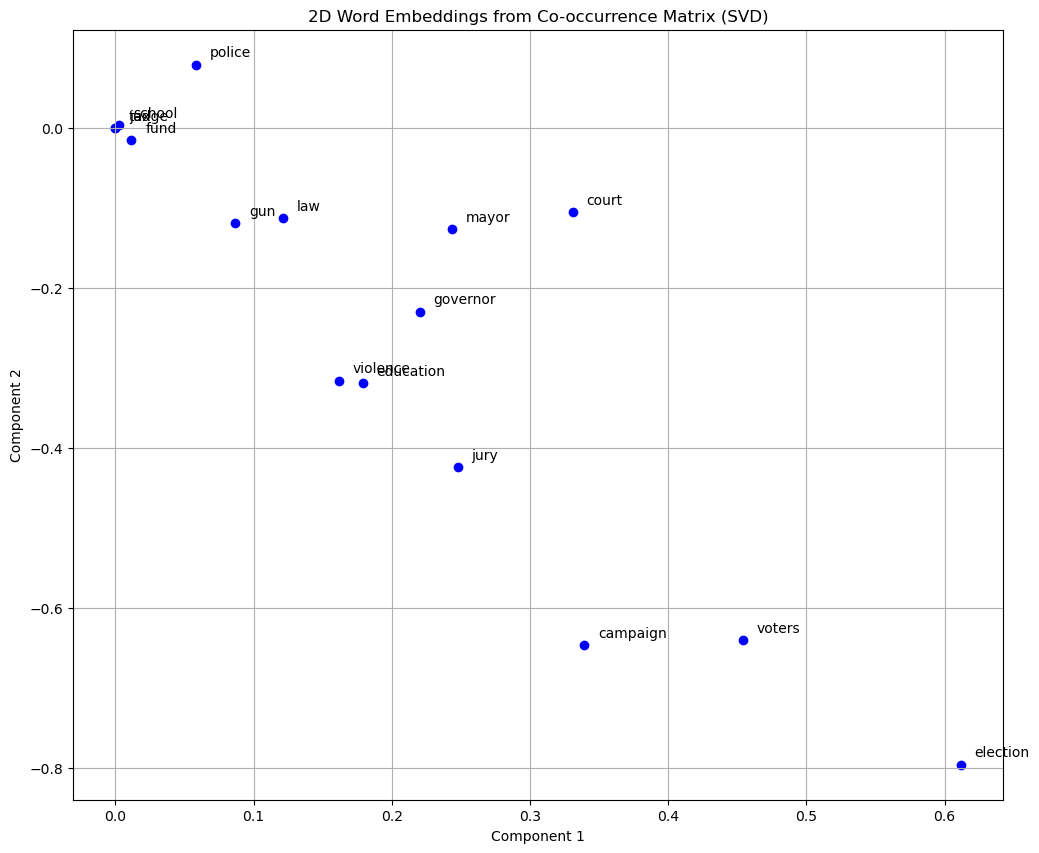

In [25]:
def plot_embeddings(M_reduced, vocab, words = None):
    word_to_index = {word: idx for idx, word in enumerate(vocab)}
    
    if words is None:
        words = vocab
    
    plt.figure(figsize=(12, 10))

    for word in words:
        if word in word_to_index:
            idx = word_to_index[word]
            x, y = M_reduced[idx]
            plt.scatter(x, y, color='blue')
            plt.text(x + 0.01, y + 0.01, word, fontsize=10)
        else:
            print(f"'{word}' not found in vocabulary.")
    
    plt.title("2D Word Embeddings from Co-occurrence Matrix (SVD)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

M_reduced = reduce_to_k_dim(co_matrix)

# Our selected words are below. Next to them are a comment on what general type we would expect the words to fall under
# (and as such they should be relatively close to one another)

words = [
    'jury',        # law
    'judge',       # law
    'court',       # law
    'law',         # law
    'police',      # law
    'election',    # political
    'governor',    # political
    'mayor',       # political
    'campaign',    # political
    'voters',      # political
    'school',      # education
    'education',   # education
    'violence',    # violence
    'gun',         # violence
    'fund',        # finance
    'tax',         # finance
]

plot_embeddings(M_reduced, vocab, words)

## Prediction-Based Word Vectors
In this section, we load pre-trained word vectors using the **GloVe** embeddings from the [Stanford NLP paper on GloVe](https://nlp.stanford.edu/pubs/glove.pdf). The pre-trained embeddings provide rich semantic information about words based on large text corpora, allowing us to represent words as vectors that capture their meaning and relationships.

Steps:
1. **Load GloVe Word Vectors**: We use the GloVe embeddings from the `glove-wiki-gigaword-200` model, which has 200-dimensional vectors for each word.
2. **Vocabulary Matching**: We map the words from our corpus to the GloVe vocabulary and extract the corresponding vectors.
3. **Dimensionality Reduction**: After obtaining the word vectors, we reduce the dimensionality to visualize the embeddings in 2D space, allowing us to explore word relationships visually.

This is an excellent opportunity to explore how pre-trained embeddings like GloVe can be used to improve downstream NLP tasks by providing richer word representations.

In [26]:
# Do not edit
import gensim.downloader as api
import numpy as np
wv_from_bin = api.load("glove-wiki-gigaword-200")
print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))

wv_words = list(wv_from_bin.index_to_key)
unique_tokens = set(tokens)
word2ind = {}
M = []
idx = 0
print('rendering M based on wv')
for w in wv_words:
    try:
        M.append(wv_from_bin.get_vector(w))
        word2ind[w] = idx
        idx += 1
    except:
        pass

print('rendering M based on unique_tokens')
for w in unique_tokens:
    if w in wv_words:
        continue
    try:
        M.append(wv_from_bin.get_vector(w))
        word2ind[w] = idx
        idx += 1
    except:
        pass
M = np.stack(M)
M_reduced = reduce_to_k_dim(M, k=2)

M_lengths = np.linalg.norm(M_reduced, axis=1)
M_reduced_normalized = M_reduced / M_lengths[:, np.newaxis]

ImportError: cannot import name 'triu' from 'scipy.linalg' (/opt/anaconda3/lib/python3.12/site-packages/scipy/linalg/__init__.py)

### Compare plots
What stands out when comparing the two different ways of embedding using the given words?

(Use this to help answer the question in your assignment document).

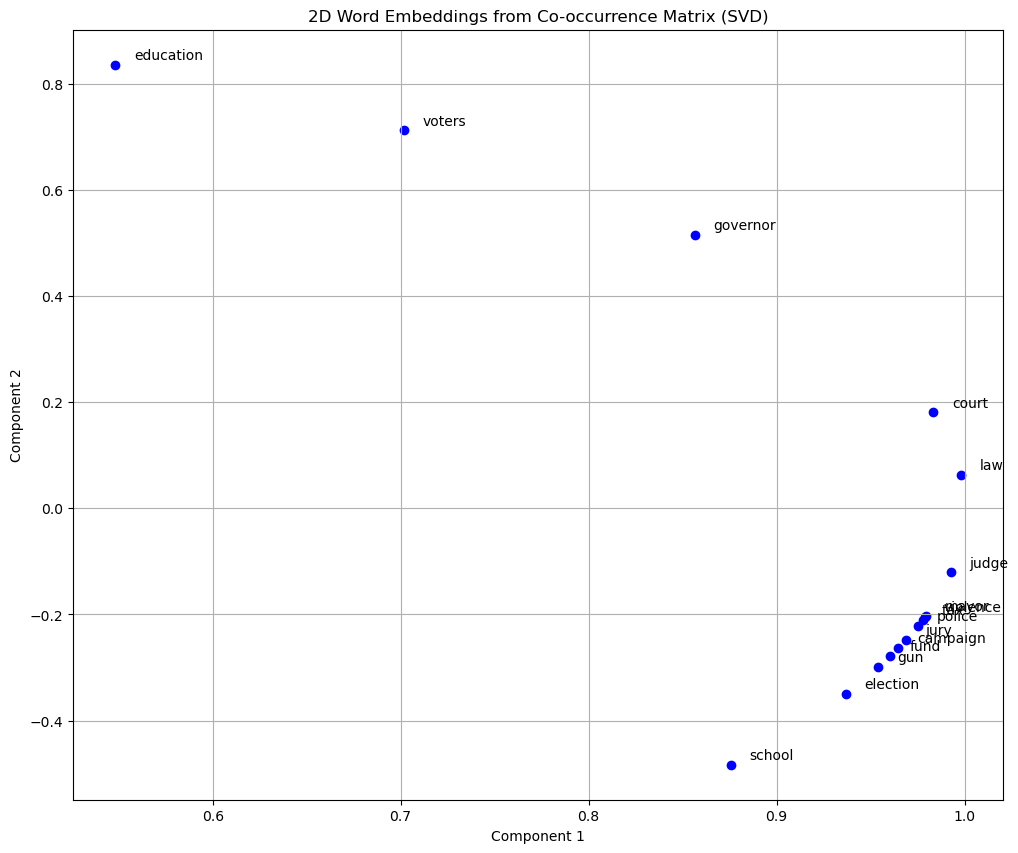

In [14]:
plot_embeddings(M_reduced_normalized, tokens, words)

# When comparing the two plots, we see that the count-based method (first plot) produces a more spread-out and interpretable arrangement of words, 
# with clear thematic clusters such as "police", "law", and "court" near each other, and "campaign", "voters", and "election" forming a separate grouping.
# In contrast, the GloVe-based method (second plot) compresses most of the words into a tight cluster, making semantic distinctions less visually clear. 
# This reflects how the count-based approach with SVD captures local co-occurrence relationships more directly, 
# while the GloVe embeddings encode broader global patterns that may require more than two dimensions to be meaningfully visualized.

### Words with multiple meanings
Polysemes and homonyms are words that have more than one meaning (see [this wiki page](https://en.wikipedia.org/wiki/Polysemy) to learn more about the difference between polysemes and homonyms). Your task is to find a word with at least two different meanings such that the top-10 most similar words (according to cosine similarity) contain related words from both meanings.

For example:
- "leaves" has both the "go_away" and "a_structure_of_a_plant" meanings in the top 10.
- "scoop" has both "handed_waffle_cone" and "lowdown" meanings in the top 10.

You will probably need to try several polysemous or homonymic words before you find one.

Once you discover a word that fits this criterion, state the word and explain the multiple meanings that occur in the top 10. Reflect on why many of the polysemous or homonymic words you tried didn’t work (i.e., why the top-10 most similar words only contain one of the word's meanings).

**Note**: Use the `wv_from_bin.most_similar(word)` function to get the top 10 most similar words. This function ranks all other words in the vocabulary based on their cosine similarity to the given word. For further assistance, you can refer to the [Gensim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html).

In [15]:
word = 'crane'

if word in wv_from_bin:
    similar_words = wv_from_bin.most_similar(word, topn=10)

    print(f"Top 10 words similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity:.4f}")
else:
    print(f"'{word}' not found in GloVe vocabulary.")


# The word "crane" fits the criterion as its top-10 most similar words for not two but THREE of its meanings: 
# bird-related words like whooping, people related last names like frasier, and machine-related words like gantry. 
# This shows that GloVe captures both senses of the word. 
# In contrast, many other polysemous words (we tried: bat, rock, spring) returned similar words tied to only one meaning. 
# This is likely because GloVe assigns a single vector per word, and the dominant meaning in the training data overwhelms less frequent senses.
# On top of this, we think crane is a word seldomly used on its own because of the many types in all 3 categories (birds, machinery and people) and such
# a wider spread of similar words is available. 

Top 10 words similar to 'crane':
cranes: 0.5965
gantry: 0.5616
sandhill: 0.5330
sarus: 0.4908
ichabod: 0.4710
barge: 0.4651
niles: 0.4439
frasier: 0.4307
whooping: 0.4218
treadwheel: 0.4142


### Synonyms
When considering **Cosine Similarity**, it's often useful to think of **Cosine Distance**, which is simply 1 - Cosine Similarity.

Find three words \( (w_1, w_2, w_3) \) where:
- \(w_1\) and \(w_2\) are **synonyms**.
- \(w_1\) and \(w_3\) are **antonyms**.

However, you need to find a case where **Cosine Distance** \( (w_1, w_3) < \text{Cosine Distance} (w_1, w_2) \). In other words, the antonym is **closer** to the word than its synonym in the vector space.

For example, "happy" (\(w_1\)) may be closer to "sad" (\(w_3\)) than to "cheerful" (\(w_2\)), which is counter-intuitive since we expect synonyms to be closer than antonyms. 

Once you find such an example, provide a possible explanation for why this result may have occurred.

Use the `wv_from_bin.distance(w1, w2)` function to compute the cosine distance between two words. You can refer to the [Gensim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html) for further assistance.







In [16]:
wv_from_bin = api.load("glove-wiki-gigaword-200")

triplets = [("happy", "cheerful", "sad"), ("hot", "warm", "cold"), ("good", "nice", "bad")]

for w1, w2, w3 in triplets:
    if w1 in wv_from_bin and w2 in wv_from_bin and w3 in wv_from_bin:
        d_syn = wv_from_bin.distance(w1, w2)
        d_ant = wv_from_bin.distance(w1, w3)
        print(f"{w1}-{w2} (synonym): {d_syn:.4f}, {w1}-{w3} (antonym): {d_ant:.4f}", end=" ")
        if d_ant < d_syn:
            print("Antonym is closer!")
        else:
            print("")
    else:
        print(f"One of the words ({w1}, {w2}, {w3}) not in vocab.")

# This probably result occurs because antonyms frequently appear in similar linguistic contexts (e.g. "hot or cold"), 
# which causes their word embeddings to be positioned close together in the vector space. 
# In contrast, synonyms may appear in slightly different contexts or registers, leading to greater separation despite being more similar in meaning.

happy-cheerful (synonym): 0.5172, happy-sad (antonym): 0.4040 Antonym is closer!
hot-warm (synonym): 0.4112, hot-cold (antonym): 0.4062 Antonym is closer!
good-nice (synonym): 0.3369, good-bad (antonym): 0.2890 Antonym is closer!


### Analogies
Word vectors have demonstrated the ability to solve analogies based on their learned semantic relationships. For instance, consider the analogy: 

**"man : grandfather :: woman : x"** 

(Read: man is to grandfather as woman is to x). Using word vectors, we can find the word \(x\) that completes the analogy.

In the example provided, we use the `most_similar` function from the Gensim library. This function identifies words that are most similar to the words in the positive list and most dissimilar to those in the negative list. For analogy solving, it effectively computes:

\[ \text{word}(x) = \text{most similar to} (\text{woman} + \text{grandfather} - \text{man}) \]

The result is the word with the highest cosine similarity to the target vector. You can use this approach to explore various analogies and gain insights into the semantic structure of word vectors.

Refer to the [Gensim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html) for more details on the `most_similar` function and how word vectors handle analogy-solving tasks.

In [17]:
# Run this cell to answer the analogy -- man : grandfather :: woman : x
print(wv_from_bin.most_similar(positive=['woman', 'grandfather'], negative=['man']))

[('grandmother', 0.7608445286750793), ('granddaughter', 0.7200807332992554), ('daughter', 0.7168302536010742), ('mother', 0.7151536345481873), ('niece', 0.7005682587623596), ('father', 0.6659888029098511), ('aunt', 0.6623408794403076), ('grandson', 0.6618767380714417), ('grandparents', 0.6446609497070312), ('wife', 0.6445354223251343)]


### Bias in word vectors
a. **Observation**: Consider the results of a word vector model when queried with analogies involving "man", "woman", and "profession". What are the top results returned by the model for each query?

When querying the analogy "man is to profession as woman is to x", the top result is "professions", followed by words like "practitioner", "teaching", "nursing", and "teacher", which are commonly associated with stereotypically female-dominated fields. In contrast, reversing the analogy — "woman is to profession as man is to x" — returns terms like "reputation", "skill", "ethic", "business", and "respected", which reflect more abstract or prestigious associations. The differences in results highlight a noticeable asymmetry in the model's treatment of gendered professional associations.

b. **Analysis**: Do you observe any gender biases in the results? For example, are certain professions more closely associated with "man" or "woman" based on the word vectors? Discuss how word embeddings might perpetuate societal biases present in the training data.

These results suggest the presence of gender bias in the word vectors, where professional roles and qualities associated with "man" tend to reflect status, ability, and business-oriented language, while those associated with "woman" lean toward caregiving, education, and traditionally female occupations. This reflects and reinforces societal stereotypes embedded in the data used to train the embeddings, rather than presenting a neutral or equitable view of professional roles.

c. **Reflection**: How might such biases affect the fairness of machine learning models that use word embeddings? Suggest potential strategies for mitigating gender bias in word vector models.

Biases like these in word embeddings can lead to unfair or stereotyped assumptions in downstream NLP tasks, such as résumé screening, chatbot behavior, or content recommendation systems. They risk perpetuating historical inequalities by encoding them into systems that appear objective. To mitigate this, developers can apply debiasing techniques, use balanced or filtered corpora, or incorporate fairness-aware evaluation metrics to identify and reduce representational harm in word vector models.

In [18]:
print(wv_from_bin.most_similar(positive=['man', 'profession'], negative=['woman']))
print()
print(wv_from_bin.most_similar(positive=['woman', 'profession'], negative=['man']))

[('reputation', 0.5250176787376404), ('professions', 0.5178037881851196), ('skill', 0.49046966433525085), ('skills', 0.49005505442619324), ('ethic', 0.4897659420967102), ('business', 0.487585186958313), ('respected', 0.4859202802181244), ('practice', 0.482104629278183), ('regarded', 0.4778572916984558), ('life', 0.4760662019252777)]

[('professions', 0.5957457423210144), ('practitioner', 0.4988412857055664), ('teaching', 0.48292139172554016), ('nursing', 0.48211804032325745), ('vocation', 0.4788965880870819), ('teacher', 0.47160351276397705), ('practicing', 0.46937811374664307), ('educator', 0.46524322032928467), ('physicians', 0.46289944648742676), ('professionals', 0.4601393938064575)]
